In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm

from scipy.stats import ttest_ind, f_oneway, kruskal # Numeric Vs Categorical
from scipy.stats import pearsonr, spearmanr # Numeric Vs numeric
from scipy.stats import chi2
from scipy.stats import chisquare # Categorical Vs Categorical




# Coin example

In [3]:
chi2.ppf(0.95, df=1)

3.841458820694124

In [4]:
# H0: Fair coin
# Ha: Biased coin
chisquare([28, 22], [25, 25])

Power_divergenceResult(statistic=0.72, pvalue=0.3961439091520741)

In [5]:
# Above, p-value was high, so we continue to believe fair coin

In [6]:
(45 - 25)**2/25 + (5 - 25)**2/25

32.0

In [7]:
# H0: fair coin
# Ha: biased coin
# 45 heads out of 50
# Instinct is to reject H0

chisquare([45, 5], [25, 25])

Power_divergenceResult(statistic=32.0, pvalue=1.5417257900280013e-08)

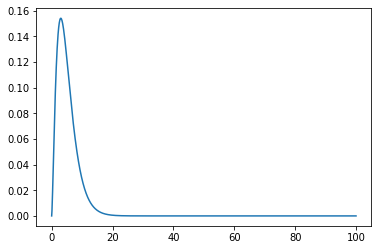

In [8]:
x_values = np.linspace(0, 100, 1000)
y_values = chi2.pdf(x_values, df=5)
plt.plot(x_values, y_values)

# Sachin

In [9]:
df = pd.read_csv("Sachin_ODI.csv")

In [10]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [11]:
df["year"] = pd.DatetimeIndex(df['Date']).year

In [12]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century,year
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False,1995
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False,1995
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False,1995
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False,1995
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False,1995


<AxesSubplot:>

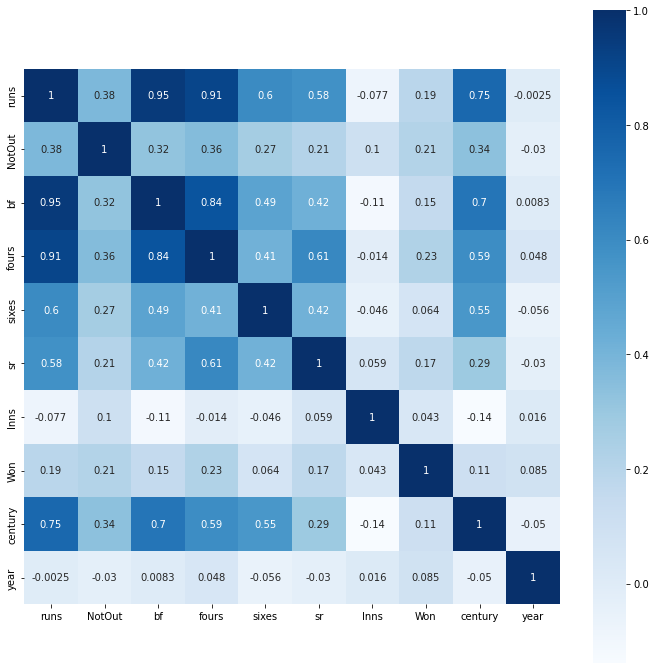

In [13]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(method='pearson', numeric_only=True), square=True, annot=True, cmap="Blues")

<AxesSubplot:xlabel='runs', ylabel='bf'>

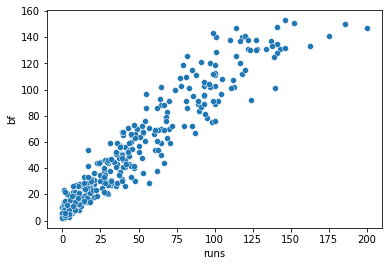

In [14]:
sns.scatterplot(x=df["runs"], y=df["bf"])

In [15]:
# H0: No correlation between runs and bf
pearsonr(df["runs"], df["bf"])
# p-value is very low, so we reject

PearsonRResult(statistic=0.9535575848467752, pvalue=1.20467394572395e-188)

In [16]:
# H0: No correlation
pearsonr(df["Won"], df["sixes"])
# p-value is high (fail to reject)

PearsonRResult(statistic=0.06383653147729071, pvalue=0.22695751355219024)

In [17]:
spearmanr(df["Won"], df["sixes"])

SignificanceResult(statistic=0.07794653119273369, pvalue=0.13993462484172392)

In [18]:
pearsonr(df["Won"], df["runs"])

PearsonRResult(statistic=0.1883186000568572, pvalue=0.00032706154973653653)